Pengumpulan Tugas
IK505 - Data Mining

Kelompok 3
- Kasyful Haq Bachariputra (2304820)
- Muhammad Akhtar Rizki Ramadha (2304742)
- Ibnu Fadhilah (2300613)
- Muhammad Naufal Arbanin (2310850)
- Hanif Ahmad Syauqi (2304330)

## PENDAHULUAN

Pandemi COVID-19 menjadi sebuah fenomena global yang sangat berpengaruh terhadap kehidupan manusia. Penelitian ini bertujuan untuk menganalisis faktor-faktor yang dapat memengaruhi tingkat persebaran COVID-19 di negara Indonesia melalui data persebaran, kematian, serta jumlah penerimaan vaksin. Hasil penelitian ini diharapkan dapat menunjukkan pada bagian mana pemerintah Indonesia masih mengalami kekurangan dalam penanganan dan dapat memberikan rekomendasi kebijakan yang lebih efektif.

## IMPLEMENTATION DATA TO PYTHON

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Kasus Terkonfirmasi Harian Jawa Barat (kth)
kth = pd.read_csv("satgas_covid_19-dp_cvd_agregat_kasus_terkonfirmasi_harian_covid19_jabar_data.csv")

# Jumlah Hasil Test PCR Harian (pcr)
pcr = pd.read_csv("satgas_covid_19-dp_cvd_pcr_akumulasi_per_hari_data.csv")

# Jumlah Penduduk Usia Kerja Terdampak Covid-19 (puk)
puk = pd.read_csv("bps-od_17254_jml_penduduk_usia_kerja_terdampak_covid_19__kategori_t.csv")

# Kasus Covid di Indonesia (bor)
bor = pd.read_csv("covid_19_indonesia_time_series_all.csv")

# Persebaran Lokasi Akses Pengguna Pusat Informasi (lap)
lap = pd.read_csv("diskominfo-od_18234_data_sebaran_lokasi_akses_pengguna_pusat_infms_koordin_data.csv")

# Jumlah Akumulasi Hasil Test PCR (pca)
pca = pd.read_csv("satgas_covid_19-dp_cvd_pcr_agregasi_provinsi_data.csv")

# Jumlah Kasus Harian di Kabupaten Bandung Barat
kbb = pd.read_csv("jmlh_kss_cvd_19_kbptn_bndng_brt_sd_dsmbr_thn_2022.csv")

# Jumlah Pengguna Fitur Akses Terbanyak di Website Pusat (fat)
fat = pd.read_csv("diskominfo-od_18234_data_sebaran_lokasi_akses_pengguna_pusat_infms_koordin_data.csv")

# Jumlah Penerima Vaksin 1 pada Rentang Umur Lansia berdasarkan provinsi di Indonesia (va1)
va1 = pd.read_csv("Map - Detail 1_data.csv", delimiter = ';')

# Jumlah Penerima Vaksin 2 pada Rentang Umur Lansia berdasarkan provinsi di Indonesia (va2)
va2 = pd.read_csv("Map - Detail 2_data.csv", delimiter = ';')

## DATA EXPLORATION

Kasus Terkonfirmasi Harian

In [83]:
kth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           1046 non-null   object
 1   total_konfirmasi  1046 non-null   int64 
 2   sembuh            1046 non-null   int64 
 3   meninggal         1046 non-null   int64 
 4   aktif             1046 non-null   int64 
 5   id                1046 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 49.2+ KB


Menunjukkan 10 data pertama kasus terkonfirmasi harian

In [84]:
kth.head(10)


,tanggal,total_konfirmasi,sembuh,meninggal,aktif,id
0,2020-03-01 00:00:00,2,0,0,2,1
1,2020-03-02 00:00:00,2,0,0,2,2
2,2020-03-03 00:00:00,2,0,1,1,3
3,2020-03-04 00:00:00,4,0,1,3,4
4,2020-03-05 00:00:00,4,0,1,3,5
5,2020-03-06 00:00:00,4,0,1,3,6
6,2020-03-07 00:00:00,4,0,1,3,7
7,2020-03-08 00:00:00,5,0,1,4,8
8,2020-03-09 00:00:00,5,0,1,4,9
9,2020-03-10 00:00:00,6,0,1,5,10


Mengecek jumlah data Not a Number (NaN) pada jumlah kasus terkonfirmasi harian

In [85]:
kth.isna().sum()

tanggal             0
total_konfirmasi    0
sembuh              0
meninggal           0
aktif               0
id                  0
dtype: int64

Mengecek data yang memiliki jumlah aktif, meninggal, dan sembuh berbeda dari total konfirmasi

In [86]:
kth.loc[kth['total_konfirmasi'] != kth['aktif'] + kth['meninggal'] + kth['sembuh']]

,tanggal,total_konfirmasi,sembuh,meninggal,aktif,id


Jumlah Hasil Test PCR

In [87]:
pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tanggal        1259 non-null   object
 1   positif        1259 non-null   int64 
 2   negatif        1259 non-null   int64 
 3   inconclusive   1259 non-null   int64 
 4   jumlah_sampel  1259 non-null   int64 
 5   id             1259 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 59.1+ KB


Menampilkan 10 data pertama Jumlah Hasil Test PCR

In [88]:
pcr.head(10)

,tanggal,positif,negatif,inconclusive,jumlah_sampel,id
0,2020-05-27 00:00:00,0,2,0,2,1
1,2020-05-28 00:00:00,1,54,0,55,2
2,2020-05-29 00:00:00,35,314,0,349,3
3,2020-05-30 00:00:00,3,114,0,117,4
4,2020-05-31 00:00:00,1,135,0,136,5
5,2020-06-01 00:00:00,2,105,0,107,6
6,2020-06-02 00:00:00,23,567,0,590,7
7,2020-06-03 00:00:00,30,504,0,534,8
8,2020-06-04 00:00:00,17,399,1,417,9
9,2020-06-05 00:00:00,12,395,0,407,10


Jumlah Penduduk Usia Kerja Terdampak Covid-19

In [89]:
puk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8 non-null      int64  
 1   kode_bulan                 8 non-null      int64  
 2   nama_bulan                 8 non-null      object 
 3   kategori_terdampak         8 non-null      object 
 4   jumlah_penduduk_terdampak  8 non-null      float64
 5   satuan                     8 non-null      object 
 6   tahun                      8 non-null      int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 580.0+ bytes


Menampilkan semua data Jumlah Penduduk Usia Kerja Terdampak Covid-19

In [90]:
puk.head(8)

,id,kode_bulan,nama_bulan,kategori_terdampak,jumlah_penduduk_terdampak,satuan,tahun
0,1,8,AGUSTUS,PENGANGGURAN KARENA COVID-19,0.70,JUTA ORANG,2020
1,2,8,AGUSTUS,BUKAN ANGKATAN KERJA (BAK) KARENA COVID-19,0.16,JUTA ORANG,2020
2,3,8,AGUSTUS,SEMENTARA TIDAK BEKERJA KARENA COVID-19,0.40,JUTA ORANG,2020
3,4,8,AGUSTUS,PENDUDUK BEKERJA YANG MENGALAMI PENGURANGAN JA...,5.10,JUTA ORANG,2020
4,5,2,FEBRUARI,PENGANGGURAN KARENA COVID-19,0.45,JUTA ORANG,2021
5,6,2,FEBRUARI,BUKAN ANGKATAN KERJA (BAK) KARENA COVID-19,0.16,JUTA ORANG,2021
6,7,2,FEBRUARI,SEMENTARA TIDAK BEKERJA KARENA COVID-19,0.26,JUTA ORANG,2021
7,8,2,FEBRUARI,PENDUDUK BEKERJA YANG MENGALAMI PENGURANGAN JA...,3.73,JUTA ORANG,2021


Melakukan drop kolom terhadap kolom 'satuan' dan 'kode_bulan' karena satuan bisa disatukan ke kolom 'jumlah_penduduk_terdampak' dengan cara mengkalikan dengan 1000000 dan 'kode_bulan' karena sudah terdapat nama bulan pada kolom 'nama_bulan'.

In [91]:
puk = puk.drop(columns = ['satuan', 'kode_bulan'])
puk['jumlah_penduduk_terdampak'] = puk['jumlah_penduduk_terdampak'] * 1000000

Menampilkan semua data Jumlah Penduduk Usia Kerja yang Terdampak oleh Covid-19 setelah kolom 'satuan' dan 'kode_bulan' sudah dihapus.

In [92]:
puk.head(8)

,id,nama_bulan,kategori_terdampak,jumlah_penduduk_terdampak,tahun
0,1,AGUSTUS,PENGANGGURAN KARENA COVID-19,700000.0,2020
1,2,AGUSTUS,BUKAN ANGKATAN KERJA (BAK) KARENA COVID-19,160000.0,2020
2,3,AGUSTUS,SEMENTARA TIDAK BEKERJA KARENA COVID-19,400000.0,2020
3,4,AGUSTUS,PENDUDUK BEKERJA YANG MENGALAMI PENGURANGAN JA...,5100000.0,2020
4,5,FEBRUARI,PENGANGGURAN KARENA COVID-19,450000.0,2021
5,6,FEBRUARI,BUKAN ANGKATAN KERJA (BAK) KARENA COVID-19,160000.0,2021
6,7,FEBRUARI,SEMENTARA TIDAK BEKERJA KARENA COVID-19,260000.0,2021
7,8,FEBRUARI,PENDUDUK BEKERJA YANG MENGALAMI PENGURANGAN JA...,3730000.0,2021


Mengecek jumlah data Not a Number (NaN) pada dataframe Jumlah Penduduk Usia Kerja Terdampak oleh Covid-19

In [93]:
puk.isna().sum()

id                           0
nama_bulan                   0
kategori_terdampak           0
jumlah_penduduk_terdampak    0
tahun                        0
dtype: int64

Jumlah Keterisian Kasur berdasarkan Rumah Sakit.

In [117]:
bor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [118]:
bor.head()
# Kayaknya mending ada yang didrop si kolomnya

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [96]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               672 non-null    int64 
 1   kode_provinsi    672 non-null    int64 
 2   nama_provinsi    672 non-null    object
 3   lokasi_akses     672 non-null    object
 4   jumlah_pengguna  672 non-null    int64 
 5   satuan           672 non-null    object
 6   tahun            672 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 36.9+ KB


In [97]:
lap.head()

,id,kode_provinsi,nama_provinsi,lokasi_akses,jumlah_pengguna,satuan,tahun
0,1,32,JAWA BARAT,BANDUNG,46360,USER,2022
1,2,32,JAWA BARAT,JAKARTA,34906,USER,2022
2,3,32,JAWA BARAT,KOTA BEKASI,9993,USER,2022
3,4,32,JAWA BARAT,SURABAYA,5175,USER,2022
4,5,32,JAWA BARAT,DEPOK,3653,USER,2022


In [98]:
lap = lap.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan'])
lap.head(15)

,id,lokasi_akses,jumlah_pengguna,tahun
0,1,BANDUNG,46360,2022
1,2,JAKARTA,34906,2022
2,3,KOTA BEKASI,9993,2022
3,4,SURABAYA,5175,2022
4,5,DEPOK,3653,2022
5,6,PALEMBANG,3449,2022
6,7,MAKASSAR,2954,2022
7,8,BEKASI,2607,2022
8,9,TASIKMALAYA,2236,2022
9,10,PEKANBARU,1776,2022


In [99]:
# pca
pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hari             1288 non-null   object
 1   tanggal          1288 non-null   object
 2   jumlah_sampling  1288 non-null   int64 
 3   positif          1288 non-null   int64 
 4   negatif          1288 non-null   int64 
 5   invalid          1288 non-null   int64 
 6   id               1288 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 70.6+ KB


In [100]:
pca = pca.drop(columns=['hari'])
pca.head()

,tanggal,jumlah_sampling,positif,negatif,invalid,id
0,2023-07-19 00:00:00,5555193,1448357,4094357,12479,1
1,2023-07-15 00:00:00,5554701,1448344,4093879,12478,2
2,2023-07-14 00:00:00,5554515,1448334,4093703,12478,3
3,2023-07-13 00:00:00,5554292,1448328,4093486,12478,4
4,2023-07-12 00:00:00,5554125,1448323,4093324,12478,5


In [101]:
# kbb
kbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    165 non-null    int64 
 1   kecamatan             165 non-null    object
 2   desa                  165 non-null    object
 3   konfirmasi_total      165 non-null    int64 
 4   konfirmasi_sembuh     165 non-null    int64 
 5   konfirmasi_meninggal  165 non-null    int64 
 6   kontak_erat           165 non-null    int64 
 7   suspek                165 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 10.4+ KB


In [102]:
kbb.head()

,id,kecamatan,desa,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,kontak_erat,suspek
0,1,Rongga,Cicadas,7,7,0,0,0
1,2,Rongga,Cibedug,73,73,0,7,1
2,3,Rongga,Sukamanah,52,52,0,6,0
3,4,Rongga,Bojong,55,55,0,1,1
4,5,Rongga,Bojongsalam,11,11,0,7,1


In [103]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               672 non-null    int64 
 1   kode_provinsi    672 non-null    int64 
 2   nama_provinsi    672 non-null    object
 3   lokasi_akses     672 non-null    object
 4   jumlah_pengguna  672 non-null    int64 
 5   satuan           672 non-null    object
 6   tahun            672 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 36.9+ KB


In [113]:
fat.head(15)

,id,kode_provinsi,nama_provinsi,lokasi_akses,jumlah_pengguna,satuan,tahun
0,1,32,JAWA BARAT,BANDUNG,46360,USER,2022
1,2,32,JAWA BARAT,JAKARTA,34906,USER,2022
2,3,32,JAWA BARAT,KOTA BEKASI,9993,USER,2022
3,4,32,JAWA BARAT,SURABAYA,5175,USER,2022
4,5,32,JAWA BARAT,DEPOK,3653,USER,2022
5,6,32,JAWA BARAT,PALEMBANG,3449,USER,2022
6,7,32,JAWA BARAT,MAKASSAR,2954,USER,2022
7,8,32,JAWA BARAT,BEKASI,2607,USER,2022
8,9,32,JAWA BARAT,TASIKMALAYA,2236,USER,2022
9,10,32,JAWA BARAT,PEKANBARU,1776,USER,2022


In [105]:
va1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_1        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [106]:
va1.head()

,provinsi_sasaran,divaksin_1
0,YOGYAKARTA,410448
1,SUMATERA UTARA,986519
2,SUMATERA SELATAN,455619
3,SUMATERA BARAT,511079
4,SULAWESI UTARA,189302


In [107]:
va2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi_sasaran  34 non-null     object
 1   divaksin_2        35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [108]:
va2.head()

,provinsi_sasaran,divaksin_2
0,YOGYAKARTA,375801
1,SUMATERA UTARA,850261
2,SUMATERA SELATAN,353171
3,SUMATERA BARAT,399757
4,SULAWESI UTARA,146149


## ANALYSIS AND VISUALIZATIONS

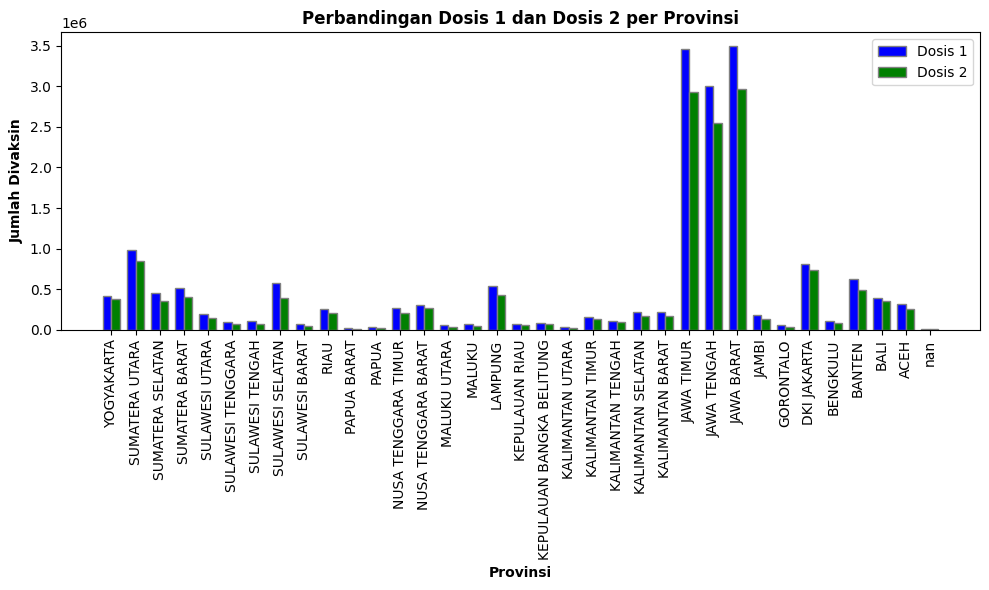

In [111]:
# Menggabungkan 2 data berdasaarkan pada provinsi_sasaran
merged_data = pd.merge(va1, va2, on='provinsi_sasaran')

# Membuat grafik antara data1 (Vaksin dosis 1) dengan data2 (Vaksin dosis 2)
plt.figure(figsize=(10, 6))

# Mengatur grafik bar
bar_width = 0.35
r1 = range(len(merged_data['provinsi_sasaran']))
r2 = [x + bar_width for x in r1]

# Membuat grafik bar
plt.bar(r1, merged_data['divaksin_1'], color='b', width=bar_width, edgecolor='grey', label='Dosis 1')
plt.bar(r2, merged_data['divaksin_2'], color='g', width=bar_width, edgecolor='grey', label='Dosis 2')

# Menambahkan judul dan label
plt.xlabel('Provinsi', fontweight='bold')
plt.ylabel('Jumlah Divaksin', fontweight='bold')
plt.title('Perbandingan Dosis 1 dan Dosis 2 per Provinsi', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(merged_data['provinsi_sasaran']))], merged_data['provinsi_sasaran'], rotation=90)

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

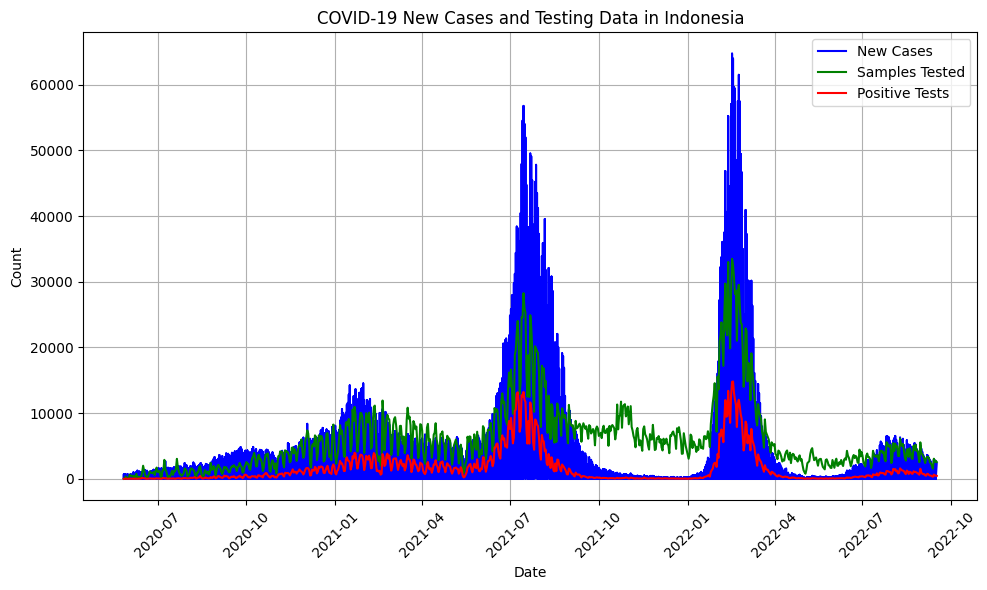

In [119]:
# Melakukan pembersihan data dan mengkonversikannya agar bisa di gabungkan
bor['Date'] = pd.to_datetime(bor['Date'])
pcr['tanggal'] = pd.to_datetime(pcr['tanggal'])

# melakukan gabung data
merged_df = pd.merge(bor, pcr, left_on='Date', right_on='tanggal', how='inner')

# Cari kolom yang relevan dengan 2 data sebelumnya
plot_data = merged_df[['Date', 'New Cases', 'New Deaths', 'positif', 'jumlah_sampel']]

# Buat grafik datanya
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(plot_data['Date'], plot_data['New Cases'], label='New Cases', color='blue')
plt.plot(plot_data['Date'], plot_data['jumlah_sampel'], label='Samples Tested', color='green')
plt.plot(plot_data['Date'], plot_data['positif'], label='Positive Tests', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 New Cases and Testing Data in Indonesia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan datanya
plt.show()

Berikut adalah plot gabungan yang menunjukkan tren kasus COVID-19 baru, sampel yang diuji, dan hasil tes positif dari waktu ke waktu di Indonesia.

- Garis biru mewakili kasus baru yang terkonfirmasi.
- Garis hijau menunjukkan total jumlah sampel yang diuji.
- Garis merah menunjukkan jumlah tes positif yang terdeteksi.